In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
df = pd.read_csv("../../../Data/tvmarketing.csv")
print(df.shape)
df.head()

(200, 2)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


# Exploratory Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [6]:
%matplotlib inline

D:\learning\aiml-handson\venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


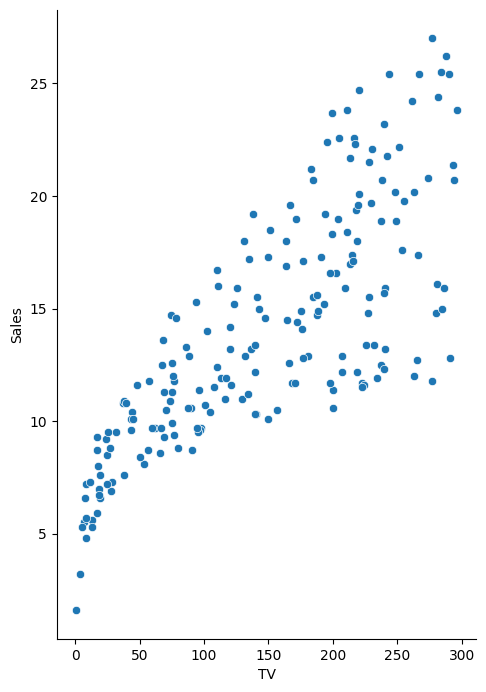

In [7]:
sns.pairplot(df, x_vars=["TV"], y_vars="Sales", size=7, aspect=0.7, kind="scatter")

# Data Preparation

In [8]:
X = df["TV"]
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [9]:
y = df["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Split data into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=377
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140,) (60,) (140,) (60,)


In [11]:
type(X_train)

pandas.core.series.Series

In [12]:
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

print(X_train.shape, X_test.shape)

(140, 1) (60, 1)


# Training

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
model.intercept_

6.752819077533612

In [15]:
model.coef_

array([0.04949493])

# Evaluation

In [16]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y predicted')

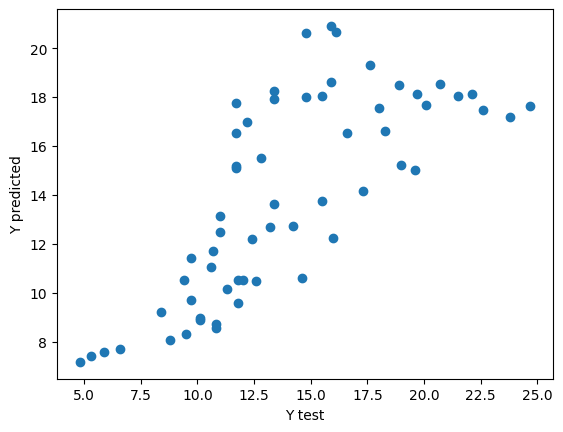

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y test")
plt.ylabel("Y predicted")

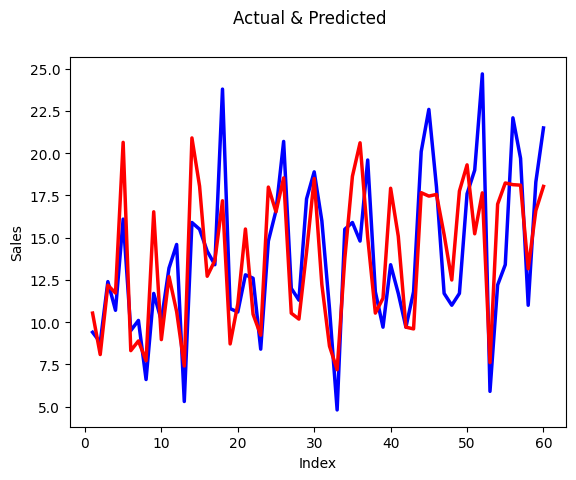

In [18]:
c = [i for i in range(1, len(y_pred) + 1)]

fig = plt.figure()

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")

fig.suptitle("Actual & Predicted")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()

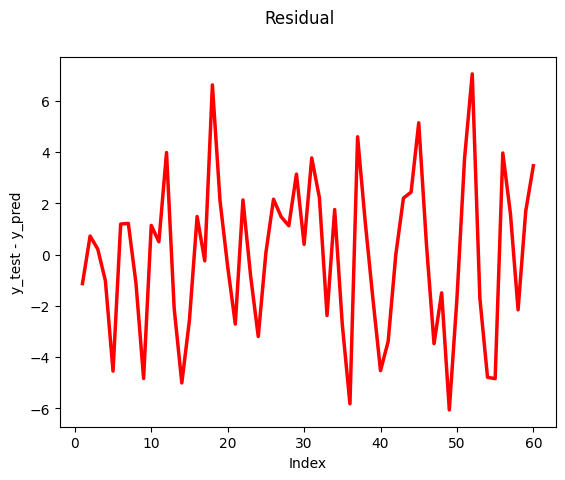

In [19]:
c = [i for i in range(1, len(y_pred) + 1)]

fig = plt.figure()

plt.plot(c, y_test - y_pred, color="red", linewidth=2.5, linestyle="-")

fig.suptitle("Residual")
plt.xlabel("Index")
plt.ylabel("y_test - y_pred")

plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred)
mse

9.414388697148585

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.5479393074417072